In [3]:
import pandas as pd
import numpy as np
import copy
%matplotlib inline

df_flights = pd.read_csv('https://raw.githubusercontent.com/ismayc/pnwflights14/master/data/flights.csv')

df_flights.head()

#https://www.datacamp.com/community/tutorials/categorical-data

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2014,1,1,1.0,96.0,235.0,70.0,AS,N508AS,145,PDX,ANC,194.0,1542,0.0,1.0
1,2014,1,1,4.0,-6.0,738.0,-23.0,US,N195UW,1830,SEA,CLT,252.0,2279,0.0,4.0
2,2014,1,1,8.0,13.0,548.0,-4.0,UA,N37422,1609,PDX,IAH,201.0,1825,0.0,8.0
3,2014,1,1,28.0,-2.0,800.0,-23.0,US,N547UW,466,PDX,CLT,251.0,2282,0.0,28.0
4,2014,1,1,34.0,44.0,325.0,43.0,AS,N762AS,121,SEA,ANC,201.0,1448,0.0,34.0


In [4]:
print(df_flights.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162049 entries, 0 to 162048
Data columns (total 16 columns):
year         162049 non-null int64
month        162049 non-null int64
day          162049 non-null int64
dep_time     161192 non-null float64
dep_delay    161192 non-null float64
arr_time     161061 non-null float64
arr_delay    160748 non-null float64
carrier      162049 non-null object
tailnum      161801 non-null object
flight       162049 non-null int64
origin       162049 non-null object
dest         162049 non-null object
air_time     160748 non-null float64
distance     162049 non-null int64
hour         161192 non-null float64
minute       161192 non-null float64
dtypes: float64(7), int64(5), object(4)
memory usage: 19.8+ MB
None


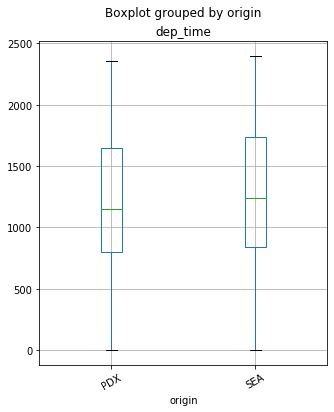

In [5]:
df_flights.boxplot('dep_time','origin',rot = 30,figsize=(5,6))

In [6]:
categorical_flights_df = df_flights.select_dtypes(include=['object']).copy()

In [8]:
# print only categorical
categorical_flights_df.head(10)

,carrier,tailnum,origin,dest
0,AS,N508AS,PDX,ANC
1,US,N195UW,SEA,CLT
2,UA,N37422,PDX,IAH
3,US,N547UW,PDX,CLT
4,AS,N762AS,SEA,ANC
5,DL,N806DN,SEA,DTW
6,UA,N14219,SEA,ORD
7,UA,N813UA,PDX,IAH
8,UA,N75433,SEA,DEN
9,UA,N574UA,SEA,EWR


In [9]:
# Null value check
print(categorical_flights_df.isnull().values.sum())

248


In [11]:
# check to see who has the nulls
print(categorical_flights_df.isnull().sum())

carrier      0
tailnum    248
origin       0
dest         0
dtype: int64


In [ ]:
# fill in nulls with category mode
# The value_counts returns the frequency distribution of each category in the feature, and then selecting the top category, which is the mode, with the .index attribute

In [13]:
categorical_flights_df = categorical_flights_df.fillna(categorical_flights_df['tailnum'].value_counts().index[0])

In [14]:
print(categorical_flights_df.isnull().values.sum())

0


In [15]:
categorical_flights_df.head(2)

,carrier,tailnum,origin,dest
0,AS,N508AS,PDX,ANC
1,US,N195UW,SEA,CLT


In [16]:
print(categorical_flights_df['carrier'].value_counts())

AS    62460
WN    23355
OO    18710
DL    16716
UA    16671
AA     7586
US     5946
B6     3540
VX     3272
F9     2698
HA     1095
Name: carrier, dtype: int64


In [17]:
# use seaborn for plot
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

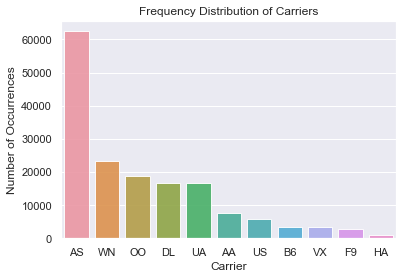

In [18]:
carrier_count = categorical_flights_df['carrier'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of Carriers')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Carrier', fontsize=12)
plt.show()

## Encoding Categorical data

In [19]:
# create a dictionary to map numbers for each category in carrier column

#### using mapping

In [20]:
replace_map = {'carrier': {'AA': 1, 'AS': 2, 'B6': 3, 'DL': 4,
                                  'F9': 5, 'HA': 6, 'OO': 7 , 'UA': 8 , 'US': 9,'VX': 10,'WN': 11}}

In [21]:
cat_df_flights_replace = categorical_flights_df.copy()

In [23]:
print(cat_df_flights_replace.head())

  carrier tailnum origin dest
0      AS  N508AS    PDX  ANC
1      US  N195UW    SEA  CLT
2      UA  N37422    PDX  IAH
3      US  N547UW    PDX  CLT
4      AS  N762AS    SEA  ANC


In [25]:
cat_df_flights_replace.replace(replace_map, inplace=True)

print(cat_df_flights_replace.head())

   carrier tailnum origin dest
0        2  N508AS    PDX  ANC
1        9  N195UW    SEA  CLT
2        8  N37422    PDX  IAH
3        9  N547UW    PDX  CLT
4        2  N762AS    SEA  ANC


In [26]:
print(cat_df_flights_replace['carrier'].dtype)

int64


In [28]:
# typecast categorical features to dtype category
cat_df_flights_lc = cat_df_flights_replace.copy()
cat_df_flights_lc['carrier'] = cat_df_flights_lc['carrier'].astype('category')
cat_df_flights_lc['origin'] = cat_df_flights_lc['origin'].astype('category')                                                              


In [29]:
print(cat_df_flights_lc.dtypes)

carrier    category
tailnum      object
origin     category
dest         object
dtype: object


## Label encoding

In [30]:
cat_df_flights_lc['carrier'] = cat_df_flights_lc['carrier'].cat.codes


In [31]:
cat_df_flights_lc.head() #alphabetically labeled from 0 to 10


,carrier,tailnum,origin,dest
0,1,N508AS,PDX,ANC
1,8,N195UW,SEA,CLT
2,7,N37422,PDX,IAH
3,8,N547UW,PDX,CLT
4,1,N762AS,SEA,ANC


In [ ]:
# note that all the categories have been translated to numeric values

### label encoder

In [ ]:
# the only problem with lable encoding is that the varying numbers can be misintrpreted as value imbued

In [36]:
cat_df_flights_sklearn = categorical_flights_df.copy()

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
cat_df_flights_sklearn['carrier_code'] = lb_make.fit_transform(categorical_flights_df['carrier'])

cat_df_flights_sklearn.head() #Results in appending a new column to df

,carrier,tailnum,origin,dest,carrier_code
0,AS,N508AS,PDX,ANC,1
1,US,N195UW,SEA,CLT,8
2,UA,N37422,PDX,IAH,7
3,US,N547UW,PDX,CLT,8
4,AS,N762AS,SEA,ANC,1


### One-Hot Encoding

In [38]:
#There are mainly three arguments important here, the first one is the DataFrame you want to encode on, second being the columns argument which lets you specify the columns you want to do encoding on, and third, the prefix argument which lets you specify the prefix for the new columns that will be created after encoding.


In [39]:
cat_df_flights_onehot = categorical_flights_df.copy()
cat_df_flights_onehot = pd.get_dummies(cat_df_flights_onehot, columns=['carrier'], prefix = ['carrier'])

print(cat_df_flights_onehot.head())

  tailnum origin dest  carrier_AA  carrier_AS  carrier_B6  carrier_DL  \
0  N508AS    PDX  ANC           0           1           0           0   
1  N195UW    SEA  CLT           0           0           0           0   
2  N37422    PDX  IAH           0           0           0           0   
3  N547UW    PDX  CLT           0           0           0           0   
4  N762AS    SEA  ANC           0           1           0           0   

   carrier_F9  carrier_HA  carrier_OO  carrier_UA  carrier_US  carrier_VX  \
0           0           0           0           0           0           0   
1           0           0           0           0           1           0   
2           0           0           0           1           0           0   
3           0           0           0           0           1           0   
4           0           0           0           0           0           0   

   carrier_WN  
0           0  
1           0  
2           0  
3           0  
4           0  


In [ ]:
# pip install category_encoders first

In [40]:
cat_df_flights_ce = categorical_flights_df.copy()

import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['carrier'])
df_binary = encoder.fit_transform(cat_df_flights_ce)

df_binary.head()

,carrier_0,carrier_1,carrier_2,carrier_3,carrier_4,tailnum,origin,dest
0,0,0,0,0,1,N508AS,PDX,ANC
1,0,0,0,1,0,N195UW,SEA,CLT
2,0,0,0,1,1,N37422,PDX,IAH
3,0,0,0,1,0,N547UW,PDX,CLT
4,0,0,0,0,1,N762AS,SEA,ANC
